### Import of necessary libraries

In [1]:
import pandas as pd  # For working with tables/data
import numpy as np   # For mathematical operations
import matplotlib.pyplot as plt  # For creating graphs
import seaborn as sns  # For beautiful visualizations

In [2]:
df = pd.read_csv('02_cleaned_data.csv')

print(f"✅ Data loaded: {df.shape[0]:,} samples, {df.shape[1]} features")
final_features = [col for col in df.columns if col not in ['is_attack', 'label2']]

print(f"✅ Features: {len(final_features)}")

✅ Data loaded: 685,671 samples, 42 features
✅ Features: 40


# STEP 4 : TRAINING

### 🧠 Model 1: Logistic Regression 

In [3]:
from sklearn.model_selection import train_test_split

X = df[final_features]
y = df['is_attack']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(X_train.shape, X_test.shape)


(548536, 40) (137135, 40)


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [5]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
log_reg = LogisticRegression(max_iter=5000,  class_weight='balanced')

# Train the model
log_reg.fit(X_train_scaled, y_train)


LogisticRegression(class_weight='balanced', max_iter=5000)

Accuracy: 0.9020
Precision: 0.9565
Recall: 0.8007
F1-Score: 0.8717


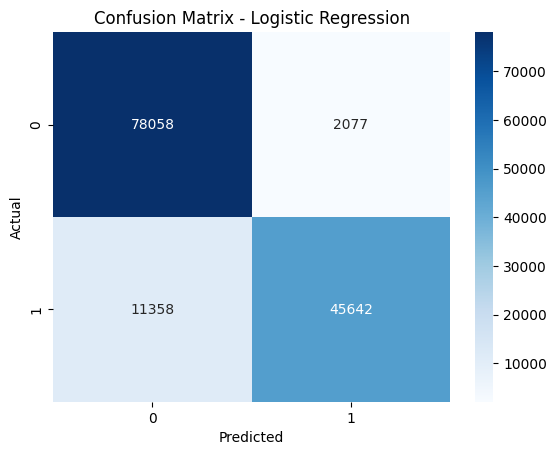

In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Predictions
y_pred = log_reg.predict(X_test_scaled)

# Evaluation metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-Score: {f1:.4f}")

# Confusion matrix 
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### 🧠 Model 2: K-Nearest Neighbors (KNN)

In [8]:
from sklearn.neighbors import KNeighborsClassifier

# Create and train KNN model
knn = KNeighborsClassifier(n_neighbors=7, weights='distance')
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=7, weights='distance')

Accuracy: 0.9580
Precision: 0.9891
Recall: 0.9090
F1-Score: 0.9474


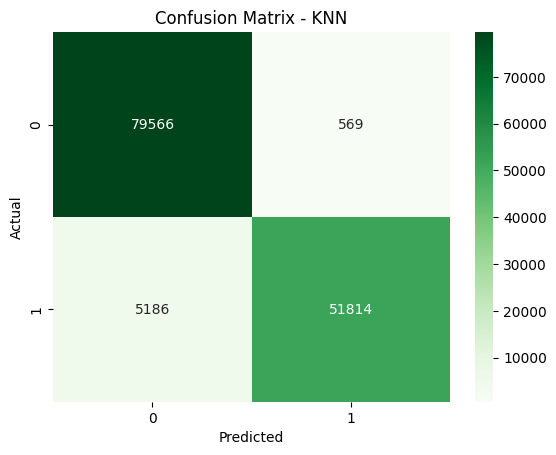

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict
y_pred_knn = knn.predict(X_test_scaled)

# Evaluate
acc = accuracy_score(y_test, y_pred_knn)
prec = precision_score(y_test, y_pred_knn, zero_division=0)
rec = recall_score(y_test, y_pred_knn, zero_division=0)
f1 = f1_score(y_test, y_pred_knn, zero_division=0)

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-Score: {f1:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#  Model 3: Decision Tree Classifier 

In [10]:
# Step 1: Import Required Libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
# Step 2: Create and Train Decision Tree Model
# max_depth=10 limits tree depth to prevent overfitting
# random_state=42 ensures reproducibility

dt = DecisionTreeClassifier(random_state=42, max_depth=10,class_weight='balanced')
dt.fit(X_train_scaled, y_train)

print("✅ Decision Tree model trained successfully!")

✅ Decision Tree model trained successfully!


✅ Predictions made on 137135 test samples
DECISION TREE - PERFORMANCE METRICS
Accuracy:  0.9582
Precision: 0.9885
Recall:    0.9099
F1-Score:  0.9476


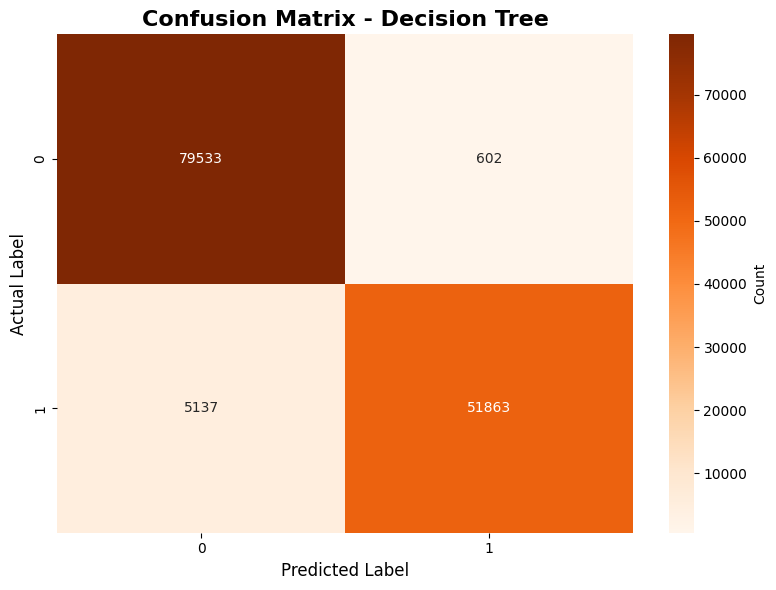


📊 Confusion Matrix Breakdown:
True Negatives (Normal correctly identified): 79533
False Positives (Normal flagged as Attack): 602
False Negatives (Attack missed): 5137
True Positives (Attack correctly identified): 51863


In [13]:
# Step 3: Make Predictions on Test Set
y_pred_dt = dt.predict(X_test_scaled)

print(f"✅ Predictions made on {len(y_pred_dt)} test samples")
# Step 4: Evaluate Model Performance
acc = accuracy_score(y_test, y_pred_dt)
prec = precision_score(y_test, y_pred_dt, zero_division=0)
rec = recall_score(y_test, y_pred_dt, zero_division=0)
f1 = f1_score(y_test, y_pred_dt, zero_division=0)

print("=" * 50)
print("DECISION TREE - PERFORMANCE METRICS")
print("=" * 50)
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1-Score:  {f1:.4f}")
print("=" * 50)
# Confusion Matrix
# Step 5: Visualize Confusion Matrix
cm = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix - Decision Tree', fontsize=16, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('Actual Label', fontsize=12)
plt.tight_layout()
plt.show()

print(f"\n📊 Confusion Matrix Breakdown:")
print(f"True Negatives (Normal correctly identified): {cm[0][0]}")
print(f"False Positives (Normal flagged as Attack): {cm[0][1]}")
print(f"False Negatives (Attack missed): {cm[1][0]}")
print(f"True Positives (Attack correctly identified): {cm[1][1]}")

## Model 4 : Random Forest

In [14]:
# Step 1: Import Libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


In [16]:
# Retrain Random Forest with class weights
# Make attack class even more important
# Retrain Random Forest with class weights
rf_weighted = RandomForestClassifier(
    n_estimators=300,
    max_depth=25,
   class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

rf_weighted.fit(X_train_scaled, y_train)
y_pred_weighted = rf_weighted.predict(X_test_scaled)

print("="*60)
print("RANDOM FOREST WITH CLASS WEIGHTS")
print("="*60)
print(f"Accuracy:  {accuracy_score(y_test, y_pred_weighted):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_weighted):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_weighted):.4f}")
print(f"F1-Score:  {f1_score(y_test, y_pred_weighted):.4f}")
print("="*60)

RANDOM FOREST WITH CLASS WEIGHTS
Accuracy:  0.9667
Precision: 0.9976
Recall:    0.9220
F1-Score:  0.9583


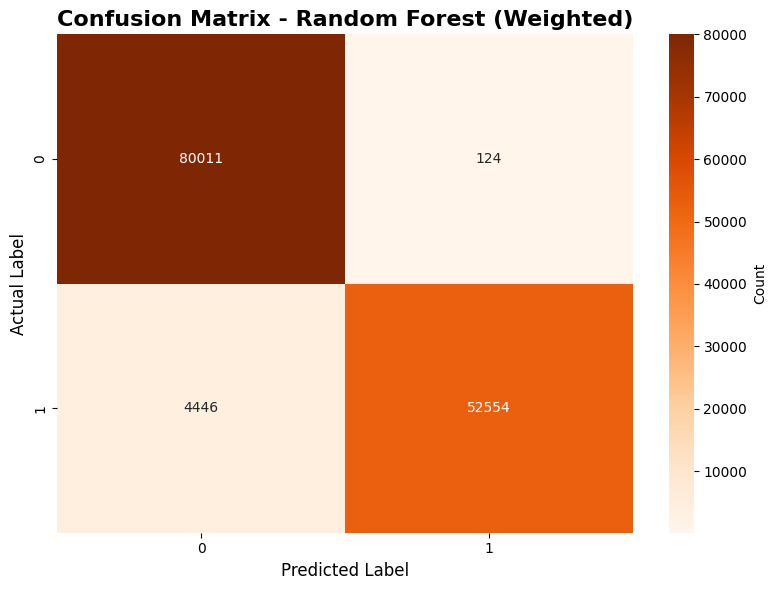


📊 Confusion Matrix Breakdown:
True Negatives (Normal correctly identified): 80011
False Positives (Normal flagged as Attack): 124
False Negatives (Attack missed): 4446
True Positives (Attack correctly identified): 52554


In [17]:
# Step 3: Visualize Confusion Matrix
cm = confusion_matrix(y_test, y_pred_weighted)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix - Random Forest (Weighted)', fontsize=16, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('Actual Label', fontsize=12)
plt.tight_layout()
plt.show()

print(f"\n📊 Confusion Matrix Breakdown:")
print(f"True Negatives (Normal correctly identified): {cm[0][0]}")
print(f"False Positives (Normal flagged as Attack): {cm[0][1]}")
print(f"False Negatives (Attack missed): {cm[1][0]}")
print(f"True Positives (Attack correctly identified): {cm[1][1]}")

### Model comparison 

This cell compares already trained models using test data.
It calculates accuracy, precision, recall, and F1-score, and shows results
with tables and plots.  
The comparison results are saved to `model_comparison_results.csv`.


📊 COLLECTING RESULTS FROM EXISTING MODELS...
✅ Logistic Regression - collected
✅ KNN - collected
✅ Decision Tree - collected
✅ Random Forest - collected

📊 Total models found: 4

📊 MODEL PERFORMANCE COMPARISON

              Model  Accuracy  Precision   Recall  F1-Score
      Random Forest  0.966675   0.997646 0.922000  0.958333
      Decision Tree  0.958151   0.988526 0.909877  0.947572
                KNN  0.958034   0.989138 0.909018  0.947387
Logistic Regression  0.902031   0.956474 0.800737  0.871704

🏆 BEST MODEL: Random Forest
   F1-Score: 0.9583
   Accuracy: 0.9667
   Precision: 0.9976
   Recall: 0.9220


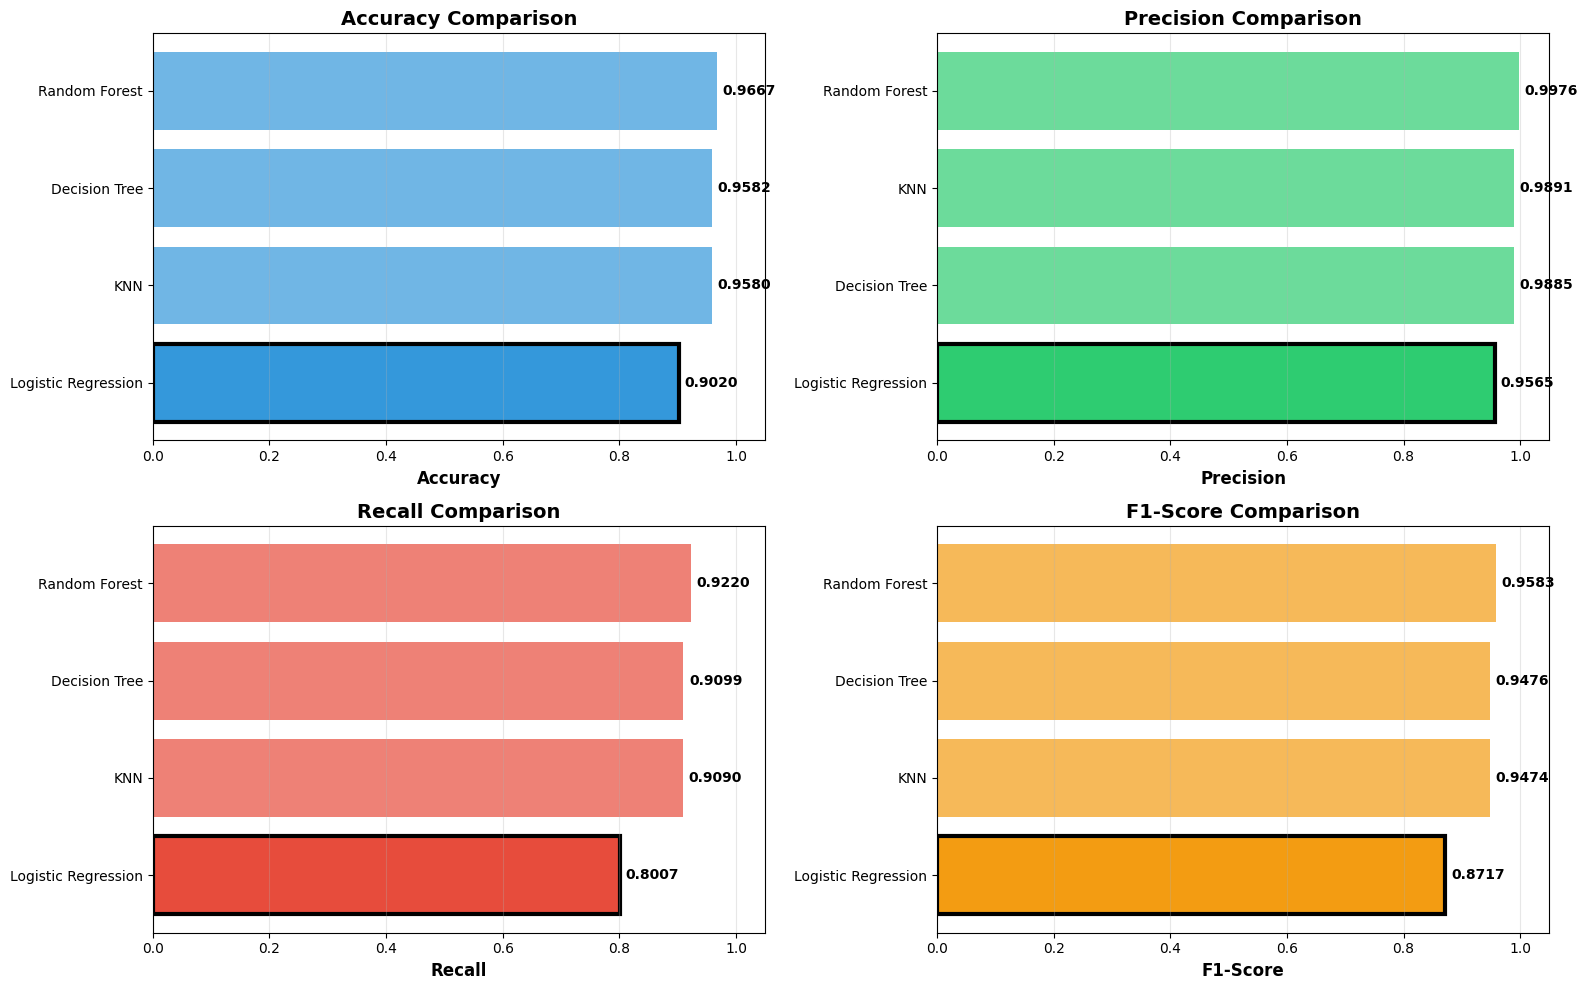

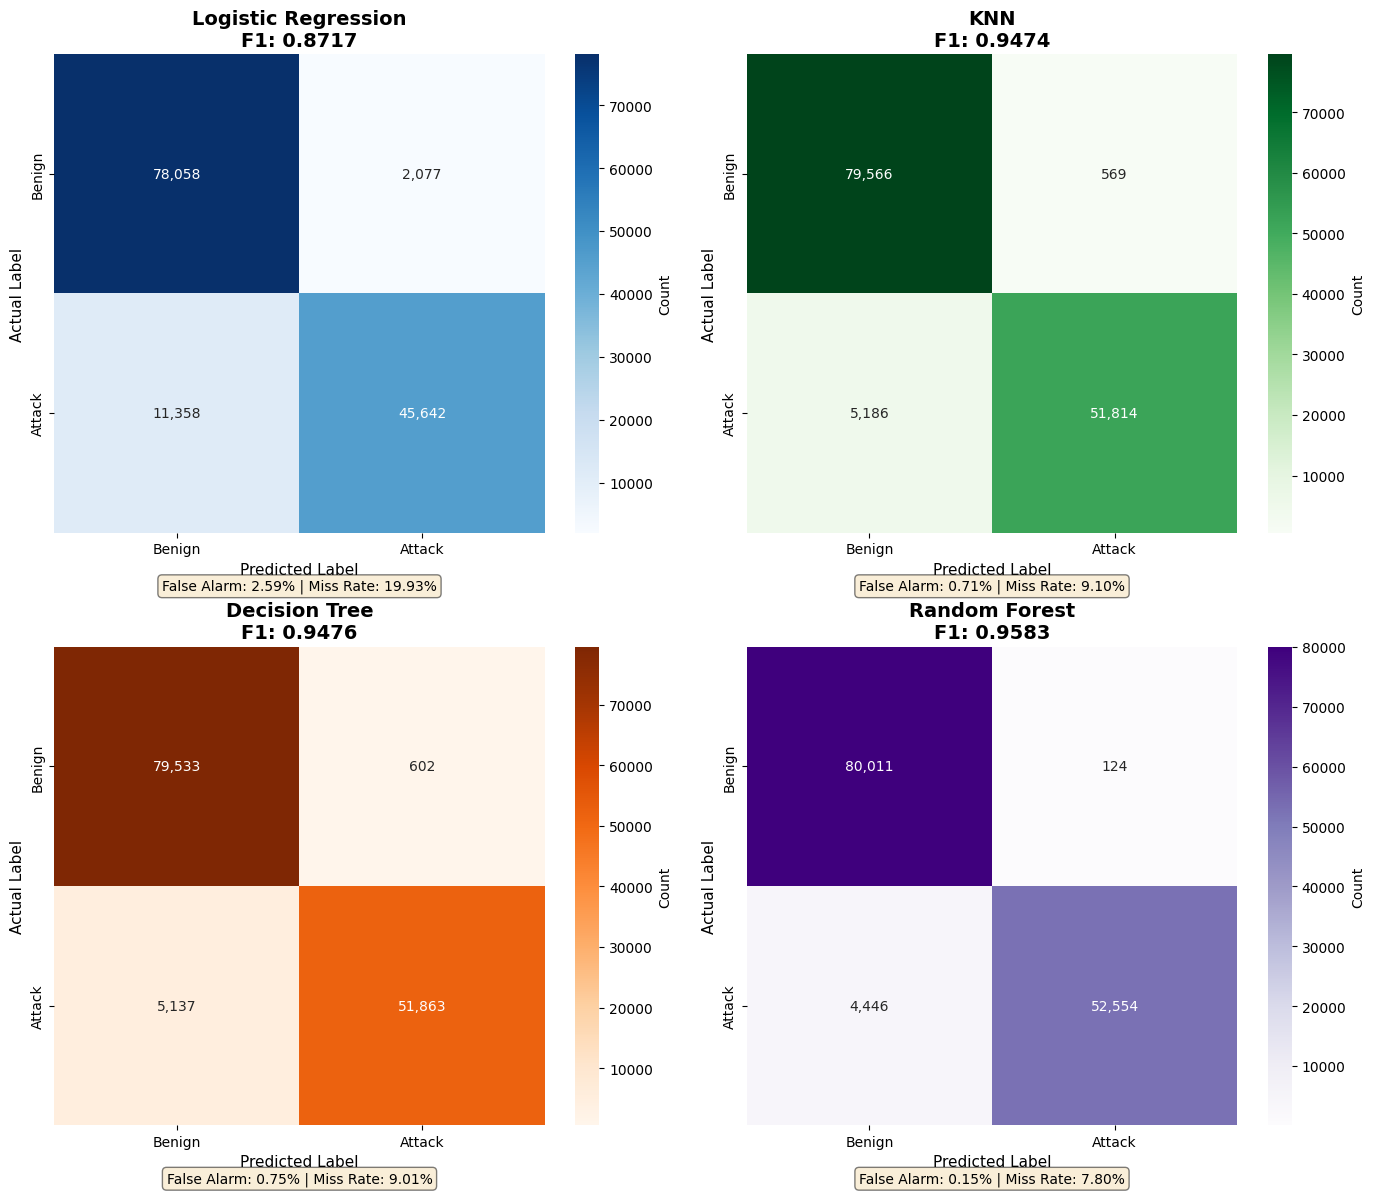

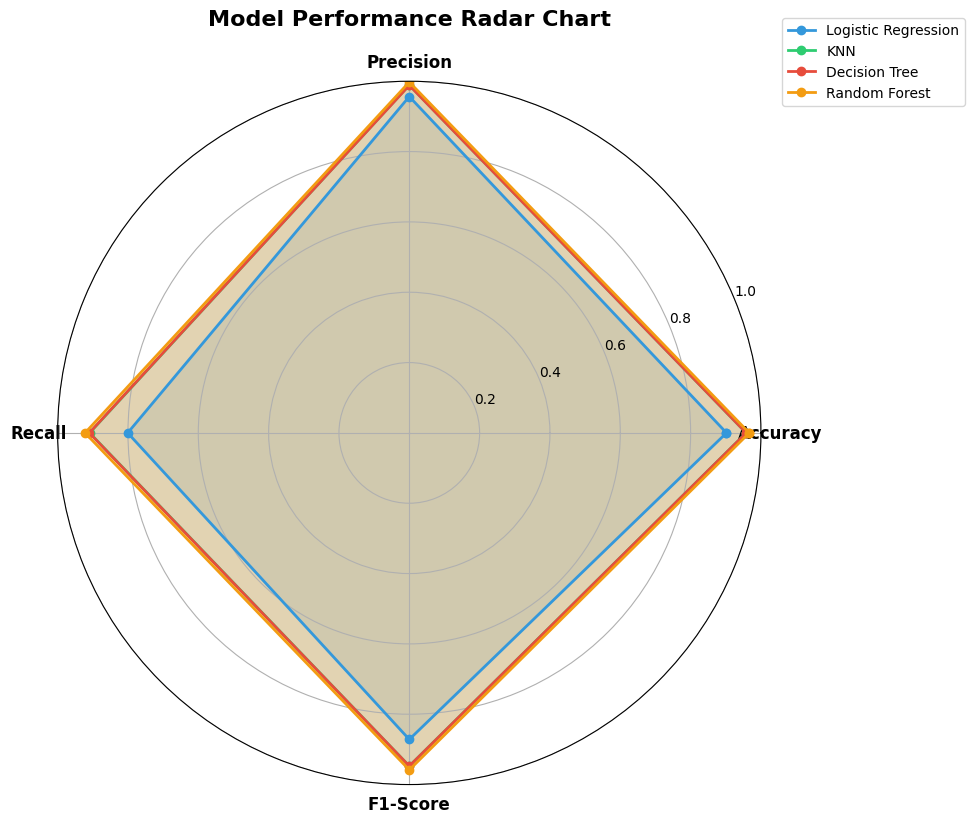

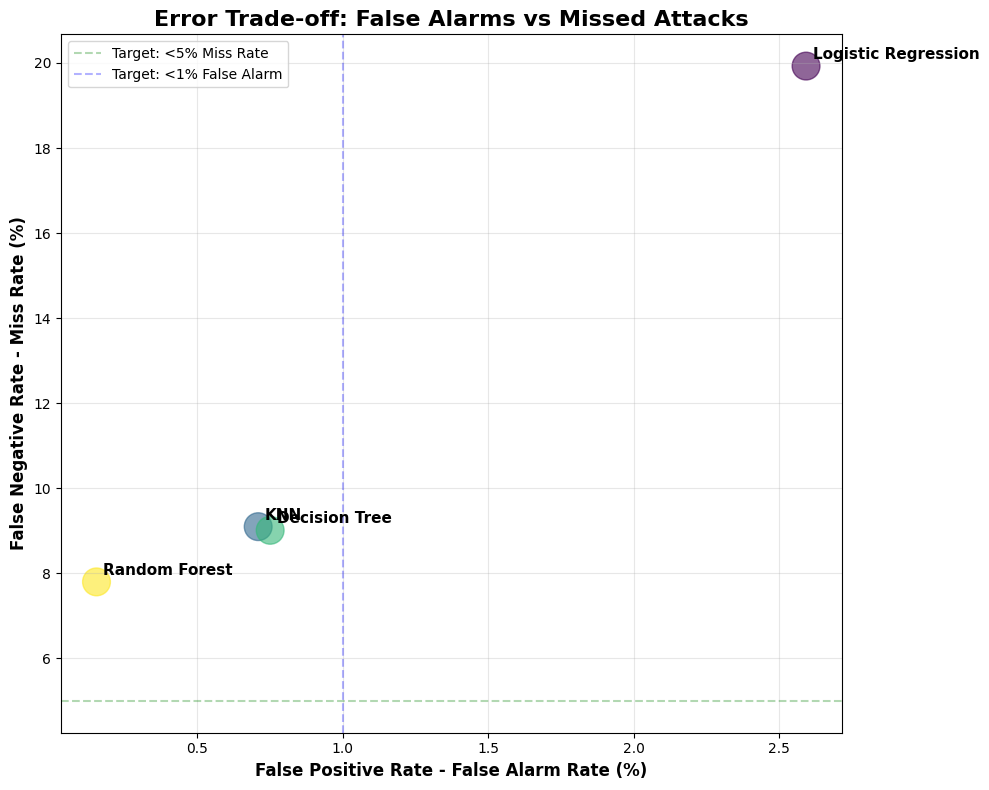


📋 DETAILED CONFUSION MATRIX BREAKDOWN

Logistic Regression:
  ✅ True Negatives (Benign correctly identified):   78,058
  ⚠️  False Positives (False alarms):                  2,077 ( 2.59%)
  ❌ False Negatives (Missed attacks):               11,358 (19.93%)
  ✅ True Positives (Attacks caught):                45,642

KNN:
  ✅ True Negatives (Benign correctly identified):   79,566
  ⚠️  False Positives (False alarms):                    569 ( 0.71%)
  ❌ False Negatives (Missed attacks):                5,186 ( 9.10%)
  ✅ True Positives (Attacks caught):                51,814

Decision Tree:
  ✅ True Negatives (Benign correctly identified):   79,533
  ⚠️  False Positives (False alarms):                    602 ( 0.75%)
  ❌ False Negatives (Missed attacks):                5,137 ( 9.01%)
  ✅ True Positives (Attacks caught):                51,863

Random Forest:
  ✅ True Negatives (Benign correctly identified):   80,011
  ⚠️  False Positives (False alarms):                    124 ( 0.15%)
  ❌ 

In [19]:
# ============================================================================
# SIMPLE MODEL COMPARISON - USE EXISTING TRAINED MODELS
# No retraining needed! Just use your already-trained models
# ============================================================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# ============================================================================
# STEP 1: COLLECT PREDICTIONS FROM YOUR ALREADY-TRAINED MODELS
# ============================================================================

print("="*80)
print("📊 COLLECTING RESULTS FROM EXISTING MODELS...")
print("="*80)

# Dictionary to store all results
results = {}

# ----------------------------------------------------------------------------
# Assuming you already have these trained models:
# - lr (Logistic Regression)
# - knn (K-Nearest Neighbors) 
# - dt (Decision Tree)
# - rf_weighted or rf (Random Forest)
# ----------------------------------------------------------------------------

# MODEL 1: Logistic Regression
if 'log_reg' in dir() or 'lr' in dir():
    model_name = 'log_reg' if 'log_reg' in dir() else 'lr'
    model = eval(model_name)
    
    y_pred_lr = model.predict(X_test_scaled)
    cm_lr = confusion_matrix(y_test, y_pred_lr)
    
    results['Logistic Regression'] = {
        'accuracy': accuracy_score(y_test, y_pred_lr),
        'precision': precision_score(y_test, y_pred_lr, zero_division=0),
        'recall': recall_score(y_test, y_pred_lr, zero_division=0),
        'f1': f1_score(y_test, y_pred_lr, zero_division=0),
        'confusion_matrix': cm_lr
    }
    print("✅ Logistic Regression - collected")
else:
    print("⚠️  Logistic Regression - not found (skip)")

# MODEL 2: KNN
if 'knn' in dir():
    y_pred_knn = knn.predict(X_test_scaled)
    cm_knn = confusion_matrix(y_test, y_pred_knn)
    
    results['KNN'] = {
        'accuracy': accuracy_score(y_test, y_pred_knn),
        'precision': precision_score(y_test, y_pred_knn, zero_division=0),
        'recall': recall_score(y_test, y_pred_knn, zero_division=0),
        'f1': f1_score(y_test, y_pred_knn, zero_division=0),
        'confusion_matrix': cm_knn
    }
    print("✅ KNN - collected")
else:
    print("⚠️  KNN - not found (skip)")

# MODEL 3: Decision Tree
if 'dt' in dir():
    y_pred_dt = dt.predict(X_test_scaled)
    cm_dt = confusion_matrix(y_test, y_pred_dt)
    
    results['Decision Tree'] = {
        'accuracy': accuracy_score(y_test, y_pred_dt),
        'precision': precision_score(y_test, y_pred_dt, zero_division=0),
        'recall': recall_score(y_test, y_pred_dt, zero_division=0),
        'f1': f1_score(y_test, y_pred_dt, zero_division=0),
        'confusion_matrix': cm_dt
    }
    print("✅ Decision Tree - collected")
else:
    print("⚠️  Decision Tree - not found (skip)")

# MODEL 4: Random Forest
if 'rf_weighted' in dir():
    y_pred_rf = rf_weighted.predict(X_test_scaled)
    cm_rf = confusion_matrix(y_test, y_pred_rf)
    
    results['Random Forest'] = {
        'accuracy': accuracy_score(y_test, y_pred_rf),
        'precision': precision_score(y_test, y_pred_rf, zero_division=0),
        'recall': recall_score(y_test, y_pred_rf, zero_division=0),
        'f1': f1_score(y_test, y_pred_rf, zero_division=0),
        'confusion_matrix': cm_rf
    }
    print("✅ Random Forest - collected")
elif 'rf' in dir():
    y_pred_rf = rf.predict(X_test_scaled)
    cm_rf = confusion_matrix(y_test, y_pred_rf)
    
    results['Random Forest'] = {
        'accuracy': accuracy_score(y_test, y_pred_rf),
        'precision': precision_score(y_test, y_pred_rf, zero_division=0),
        'recall': recall_score(y_test, y_pred_rf, zero_division=0),
        'f1': f1_score(y_test, y_pred_rf, zero_division=0),
        'confusion_matrix': cm_rf
    }
    print("✅ Random Forest - collected")
else:
    print("⚠️  Random Forest - not found (skip)")

print(f"\n📊 Total models found: {len(results)}")

# ============================================================================
# STEP 2: CREATE COMPARISON TABLE
# ============================================================================

print("\n" + "="*80)
print("📊 MODEL PERFORMANCE COMPARISON")
print("="*80)

comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[m]['accuracy'] for m in results.keys()],
    'Precision': [results[m]['precision'] for m in results.keys()],
    'Recall': [results[m]['recall'] for m in results.keys()],
    'F1-Score': [results[m]['f1'] for m in results.keys()]
})

# Sort by F1-Score
comparison_df = comparison_df.sort_values('F1-Score', ascending=False).reset_index(drop=True)

# Display styled table
print("\n" + comparison_df.to_string(index=False))

# Highlight best model
best_idx = comparison_df['F1-Score'].idxmax()
best_model = comparison_df.loc[best_idx, 'Model']
best_f1 = comparison_df.loc[best_idx, 'F1-Score']

print(f"\n🏆 BEST MODEL: {best_model}")
print(f"   F1-Score: {best_f1:.4f}")
print(f"   Accuracy: {comparison_df.loc[best_idx, 'Accuracy']:.4f}")
print(f"   Precision: {comparison_df.loc[best_idx, 'Precision']:.4f}")
print(f"   Recall: {comparison_df.loc[best_idx, 'Recall']:.4f}")

# ============================================================================
# STEP 3: VISUALIZATIONS
# ============================================================================

# ----------------------------------------------------------------------------
# 3.1: Metrics Comparison Bar Chart
# ----------------------------------------------------------------------------
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colors = ['#3498db', '#2ecc71', '#e74c3c', '#f39c12']

for idx, metric in enumerate(metrics):
    ax = axes[idx // 2, idx % 2]
    data = comparison_df.sort_values(metric, ascending=True)
    bars = ax.barh(data['Model'], data[metric], color=colors[idx], alpha=0.7)
    
    # Highlight best
    best_idx_metric = data[metric].idxmax()
    bars[best_idx_metric].set_color(colors[idx])
    bars[best_idx_metric].set_alpha(1.0)
    bars[best_idx_metric].set_edgecolor('black')
    bars[best_idx_metric].set_linewidth(3)
    
    ax.set_xlabel(metric, fontsize=12, fontweight='bold')
    ax.set_xlim(0, 1.05)
    ax.set_title(f'{metric} Comparison', fontsize=14, fontweight='bold')
    ax.grid(axis='x', alpha=0.3)
    
    # Add value labels
    for i, v in enumerate(data[metric]):
        ax.text(v + 0.01, i, f'{v:.4f}', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# ----------------------------------------------------------------------------
# 3.2: Confusion Matrices Side-by-Side
# ----------------------------------------------------------------------------
n_models = len(results)
n_cols = 2
n_rows = (n_models + 1) // 2

fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 6*n_rows))
if n_models == 1:
    axes = [axes]
else:
    axes = axes.flatten()

model_names = list(results.keys())
cmaps = ['Blues', 'Greens', 'Oranges', 'Purples']

for idx, model_name in enumerate(model_names):
    ax = axes[idx]
    cm = results[model_name]['confusion_matrix']
    
    sns.heatmap(cm, annot=True, fmt=',d', cmap=cmaps[idx % len(cmaps)], 
                cbar_kws={'label': 'Count'}, ax=ax,
                xticklabels=['Benign', 'Attack'],
                yticklabels=['Benign', 'Attack'])
    
    ax.set_title(f'{model_name}\nF1: {results[model_name]["f1"]:.4f}', 
                 fontsize=14, fontweight='bold')
    ax.set_xlabel('Predicted Label', fontsize=11)
    ax.set_ylabel('Actual Label', fontsize=11)
    
    # Add breakdown
    tn, fp, fn, tp = cm.ravel()
    fp_rate = fp / (fp + tn) * 100
    fn_rate = fn / (fn + tp) * 100
    text = f'False Alarm: {fp_rate:.2f}% | Miss Rate: {fn_rate:.2f}%'
    ax.text(0.5, -0.12, text, transform=ax.transAxes, 
            ha='center', fontsize=10, bbox=dict(boxstyle='round', 
            facecolor='wheat', alpha=0.5))

# Hide extra subplots
for idx in range(n_models, len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

# ----------------------------------------------------------------------------
# 3.3: Radar Chart
# ----------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))

categories = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
N = len(categories)
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

colors_radar = ['#3498db', '#2ecc71', '#e74c3c', '#f39c12']

for idx, model_name in enumerate(results.keys()):
    values = [
        results[model_name]['accuracy'],
        results[model_name]['precision'],
        results[model_name]['recall'],
        results[model_name]['f1']
    ]
    values += values[:1]
    
    ax.plot(angles, values, 'o-', linewidth=2, label=model_name, 
            color=colors_radar[idx % len(colors_radar)])
    ax.fill(angles, values, alpha=0.15, color=colors_radar[idx % len(colors_radar)])

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, size=12, fontweight='bold')
ax.set_ylim(0, 1)
ax.set_title('Model Performance Radar Chart', size=16, fontweight='bold', pad=20)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
ax.grid(True)

plt.tight_layout()
plt.show()

# ----------------------------------------------------------------------------
# 3.4: False Positives vs False Negatives Trade-off
# ----------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(10, 8))

fp_rates = []
fn_rates = []
model_labels = []

for model_name in results.keys():
    cm = results[model_name]['confusion_matrix']
    tn, fp, fn, tp = cm.ravel()
    
    fp_rate = fp / (fp + tn) * 100
    fn_rate = fn / (fn + tp) * 100
    
    fp_rates.append(fp_rate)
    fn_rates.append(fn_rate)
    model_labels.append(model_name)

scatter = ax.scatter(fp_rates, fn_rates, s=400, alpha=0.6, 
                    c=range(len(model_labels)), cmap='viridis')

for i, label in enumerate(model_labels):
    ax.annotate(label, (fp_rates[i], fn_rates[i]), 
                xytext=(5, 5), textcoords='offset points', 
                fontsize=11, fontweight='bold')

ax.set_xlabel('False Positive Rate - False Alarm Rate (%)', fontsize=12, fontweight='bold')
ax.set_ylabel('False Negative Rate - Miss Rate (%)', fontsize=12, fontweight='bold')
ax.set_title('Error Trade-off: False Alarms vs Missed Attacks', fontsize=16, fontweight='bold')
ax.grid(alpha=0.3)

# Add target zones
ax.axhline(y=5, color='green', linestyle='--', alpha=0.3, label='Target: <5% Miss Rate')
ax.axvline(x=1, color='blue', linestyle='--', alpha=0.3, label='Target: <1% False Alarm')
ax.legend()

plt.tight_layout()
plt.show()

# ============================================================================
# STEP 4: DETAILED BREAKDOWN
# ============================================================================

print("\n" + "="*80)
print("📋 DETAILED CONFUSION MATRIX BREAKDOWN")
print("="*80)

for model_name in results.keys():
    cm = results[model_name]['confusion_matrix']
    tn, fp, fn, tp = cm.ravel()
    
    fp_rate = fp / (fp + tn) * 100
    fn_rate = fn / (fn + tp) * 100
    
    print(f"\n{model_name}:")
    print(f"  ✅ True Negatives (Benign correctly identified):  {tn:>7,}")
    print(f"  ⚠️  False Positives (False alarms):                {fp:>7,} ({fp_rate:>5.2f}%)")
    print(f"  ❌ False Negatives (Missed attacks):              {fn:>7,} ({fn_rate:>5.2f}%)")
    print(f"  ✅ True Positives (Attacks caught):               {tp:>7,}")

# ============================================================================
# STEP 5: SAVE RESULTS
# ============================================================================

comparison_df.to_csv('model_comparison_results.csv', index=False)

print("\n" + "="*80)
print("💾 RESULTS SAVED")
print("="*80)
print("✅ model_comparison_results.csv")

print("\n" + "="*80)
print("🎯 COMPARISON COMPLETE!")
print("="*80)